Simple Linear Regression about hrs of study and test scores.


In [ ]:
%matplotlib inline
from numpy import *
import matplotlib.pyplot as plt

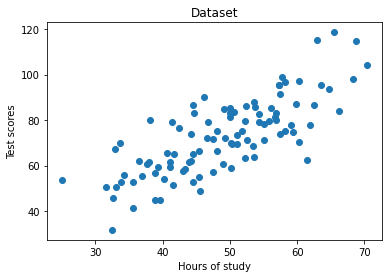

In [ ]:
points = genfromtxt('/content/drive/MyDrive/Colab Notebooks/datasets/studyhrs.csv', delimiter=',')

#Extract columns
x = array(points[:,0])
y = array(points[:,1])

#Plot the dataset
plt.scatter(x,y)
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Dataset')
plt.show()

In [ ]:
learning_rate = 0.0001
initial_b = 0
initial_m = 0
num_iterations = 10

In [ ]:
def compute_cost(b, m, points):
    total_cost = 0
    N = float(len(points))
    
    #Compute sum of squared errors
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        total_cost += (y - (m * x + b)) ** 2
        
    #Return average of squared error
    return total_cost/N

In [ ]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    cost_graph = []

    #For every iteration, optimize b, m and compute its cost
    for i in range(num_iterations):
        cost_graph.append(compute_cost(b, m, points))
        b, m = step_gradient(b, m, array(points), learning_rate)

    return [b, m, cost_graph]

def step_gradient(b_current, m_current, points, learning_rate):
    m_gradient = 0
    b_gradient = 0
    N = float(len(points))

    #Calculate Gradient
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        m_gradient += - (2/N) * x * (y - (m_current * x + b_current))
        b_gradient += - (2/N) * (y - (m_current * x + b_current))
    
    #Update current m and b
    m_updated = m_current - learning_rate * m_gradient
    b_updated = b_current - learning_rate * b_gradient

    #Return updated parameters
    return b_updated, m_updated

In [ ]:
b, m, cost_graph = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)

#Print optimized parameters
print ('Optimized b:', b)
print ('Optimized m:', m)

#Print error with optimized parameters
print ('Minimized cost:', compute_cost(b, m, points))

Optimized b: 0.02963934787473239
Optimized m: 1.4774173755483797
Minimized cost: 112.65585181499746


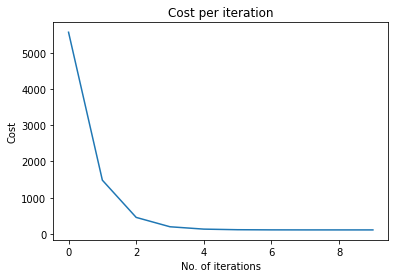

In [ ]:
plt.plot(cost_graph)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.title('Cost per iteration')
plt.show()


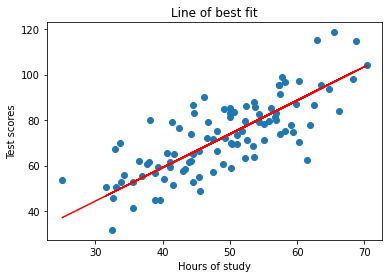

In [ ]:
#Plot dataset
plt.scatter(x, y)
#Predict y values
pred = m * x + b
#Plot predictions as line of best fit
plt.plot(x, pred, c='r')
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Line of best fit')
plt.show()

Boston house prediction

In [ ]:
from sklearn.datasets import load_boston
boston=load_boston()
print(boston.data.shape)

(506, 13)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [ ]:
print(boston.feature_names) #if wanted to get wanted datails

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [ ]:
import pandas as pd
bos=pd.DataFrame(boston.data)
print(bos)

          0     1      2    3      4   ...   8      9     10      11    12
0    0.00632  18.0   2.31  0.0  0.538  ...  1.0  296.0  15.3  396.90  4.98
1    0.02731   0.0   7.07  0.0  0.469  ...  2.0  242.0  17.8  396.90  9.14
2    0.02729   0.0   7.07  0.0  0.469  ...  2.0  242.0  17.8  392.83  4.03
3    0.03237   0.0   2.18  0.0  0.458  ...  3.0  222.0  18.7  394.63  2.94
4    0.06905   0.0   2.18  0.0  0.458  ...  3.0  222.0  18.7  396.90  5.33
..       ...   ...    ...  ...    ...  ...  ...    ...   ...     ...   ...
501  0.06263   0.0  11.93  0.0  0.573  ...  1.0  273.0  21.0  391.99  9.67
502  0.04527   0.0  11.93  0.0  0.573  ...  1.0  273.0  21.0  396.90  9.08
503  0.06076   0.0  11.93  0.0  0.573  ...  1.0  273.0  21.0  396.90  5.64
504  0.10959   0.0  11.93  0.0  0.573  ...  1.0  273.0  21.0  393.45  6.48
505  0.04741   0.0  11.93  0.0  0.573  ...  1.0  273.0  21.0  396.90  7.88

[506 rows x 13 columns]


In [ ]:
bos.columns=boston.feature_names
print(bos.head())
print(bos.columns)

      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


In [ ]:
print(bos.describe())

             CRIM          ZN       INDUS  ...     PTRATIO           B       LSTAT
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779  ...   18.455534  356.674032   12.653063
std      8.601545   23.322453    6.860353  ...    2.164946   91.294864    7.141062
min      0.006320    0.000000    0.460000  ...   12.600000    0.320000    1.730000
25%      0.082045    0.000000    5.190000  ...   17.400000  375.377500    6.950000
50%      0.256510    0.000000    9.690000  ...   19.050000  391.440000   11.360000
75%      3.677083   12.500000   18.100000  ...   20.200000  396.225000   16.955000
max     88.976200  100.000000   27.740000  ...   22.000000  396.900000   37.970000

[8 rows x 13 columns]


In [ ]:
bos['price']=boston.target  #13 input now 14 column is output
bos.shape

(506, 14)

In [ ]:
x=bos.drop('price',axis=1)
y=bos['price']
print(x.shape)
print(y.shape)
print(bos.shape)

(506, 13)
(506,)
(506, 14)


In [ ]:
import sklearn
import warnings
from sklearn.model_selection import train_test_split
warnings.simplefilter(action="ignore",category=FutureWarning)
X_train,X_test,Y_train,Y_test=sklearn.model_selection.train_test_split(x,y,test_size=0.33,random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


In [ ]:
from sklearn.linear_model import LinearRegression
im=LinearRegression()
im.fit(X_train,Y_train)
Y_pred=im.predict(X_test)

Text(0.5, 1.0, 'Prices vs Predicted prices:$Y_i$ vs $\\hat{Y}_i$')

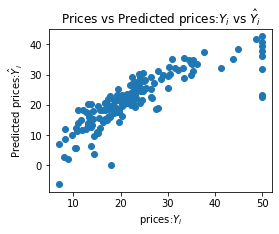

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
plt.figure(figsize=(4,3))
plt.scatter(Y_test,Y_pred)
plt.xlabel("prices:$Y_i$")
plt.ylabel("Predicted prices:$\hat{Y}_i$")
plt.title("Prices vs Predicted prices:$Y_i$ vs $\hat{Y}_i$")

In [ ]:
mse=sklearn.metrics.mean_squared_error(Y_test,Y_pred)
print(mse)

28.530458765974604


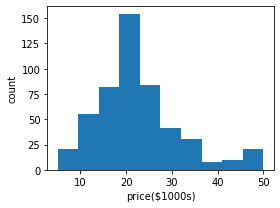

In [ ]:
plt.figure(figsize=(4,3))
plt.hist(boston.target)
plt.xlabel('price($1000s)')
plt.ylabel('count')
plt.tight_layout()